In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: >

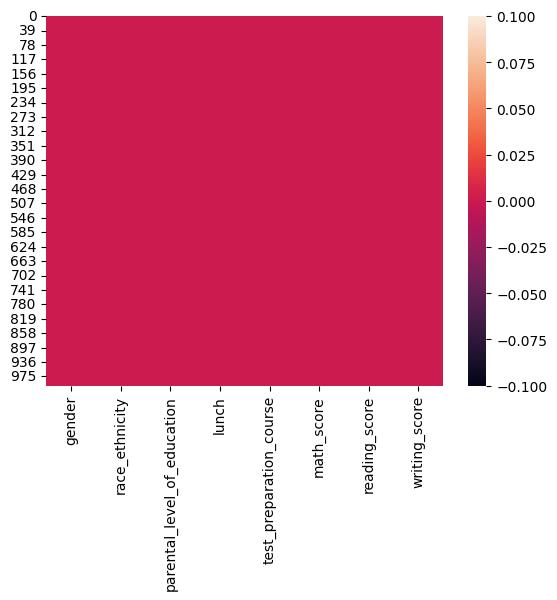

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.duplicated().sum()

0

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

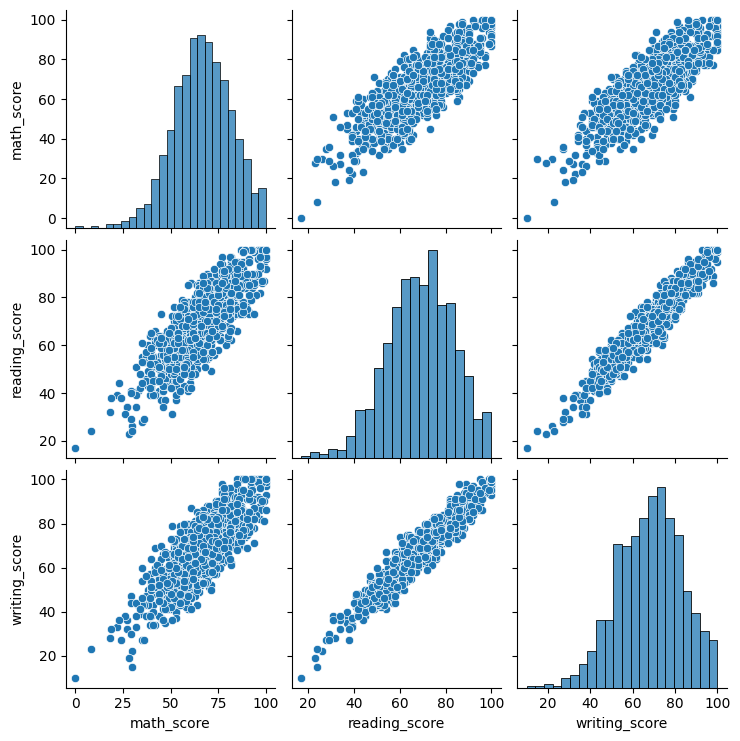

In [11]:
sns.pairplot(df)

In [13]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [15]:
print("Categories in gender feature: ", end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity feature: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education feature: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch feature: ", end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course feature: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in gender feature:  ['female' 'male']
Categories in race_ethnicity feature:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education feature:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch feature:  ['standard' 'free/reduced']
Categories in test_preparation_course feature:  ['none' 'completed']


In [18]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Total number of numerical feature is: {} and they are {}".format(len(numeric_feature), numeric_feature))
print("Total number of categorical feature is: {} and they are {}".format(len(categorical_feature), categorical_feature))

Total number of numerical feature is: 3 and they are ['math_score', 'reading_score', 'writing_score']
Total number of categorical feature is: 5 and they are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [22]:
df['Total score'] = df.math_score + df.reading_score + df.writing_score
df['Average'] = df['Total score'] // 3

In [23]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82


<Axes: xlabel='Average', ylabel='Count'>

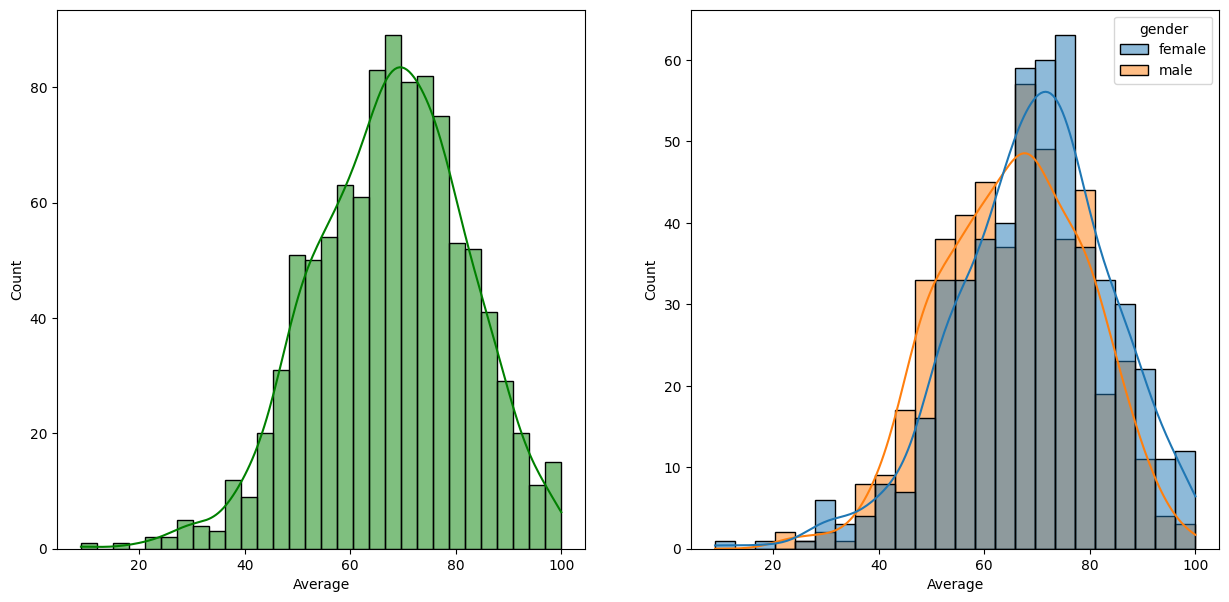

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
